<a href="https://colab.research.google.com/github/zeynepsenatatli/MachineLearningExercises/blob/main/UE04_C4E12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Batch Gradient Descent with early stopping for Softmax Regression
<BR>


In [ ]:
from sklearn.datasets import load_iris
import numpy as np

In [ ]:
iris = load_iris(as_frame=True) # The Iris dataset was loaded as a dataframe.
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"].values

In [ ]:
X.shape

(150, 2)

For every instance bias (x0 = 1) should be added.

In [ ]:
X_with_bias = np.c_[np.ones(len(X)), X]

In [ ]:
X_with_bias.shape

(150, 3)

### Split the dataset into training, validation, and test sets (manually)

In [ ]:
test_size = 30
validation_size = 30 # rest (90) for training

np.random.seed(42)
rnd_indices = np.random.permutation(len(X_with_bias))

X_train = X_with_bias[rnd_indices[:90]]
y_train = y[rnd_indices[:90]]
X_valid = X_with_bias[rnd_indices[90:120]]
y_valid = y[rnd_indices[90:120]]
X_test = X_with_bias[rnd_indices[-30:]]
y_test = y[rnd_indices[-30:]]

### Preparing y values: There are 3 classes: 0, 1,

In [ ]:
y_train

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0,
       1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0,
       0, 1])

In [ ]:
y_train_onehot = np.eye(3)[y_train] #encoding data to one hot matrices
y_train_onehot[0:10]

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [ ]:
y_train_onehot = np.eye(3)[y_train]
y_valid_onehot = np.eye(3)[y_valid]
y_test_onehot = np.eye(3)[y_test]

### Softmax Function

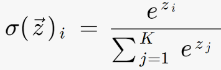



In [ ]:
def softmax(x):
    exp_x = np.exp(x)
    exp_sums = exp_x.sum(axis=1,keepdims=True)
    return exp_x / exp_sums

### Scaling inputs
The dataset has been adjusted to have a mean of 0 and a standard deviation of 1

In [ ]:
mean = X_train[:, 1:].mean(axis=0)
std = X_train[:, 1:].std(axis=0)

X_train[:, 1:] = (X_train[:, 1:] - mean) / std
X_valid[:, 1:] = (X_valid[:, 1:] - mean) / std
X_test[:, 1:] = (X_test[:, 1:] - mean) / std

### Training

Cross Entropy Loss for multiclass logistic regression (softmax regression)

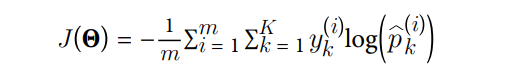

Gradient Formula:

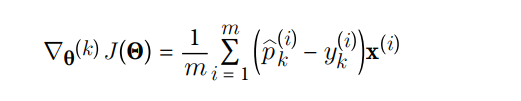

In [ ]:
n = X_train.shape[1] # inputs -> 3
k = y_train_onehot.shape[1] # output/classes -> 3
m = X_train.shape[0]

In [ ]:
epoch = 50000
learning_rate = 0.1
epsilon = 0.00001

np.random.seed(42)
w = np.random.randn(n, k) # X*w = z ->(90,3)*(3,3) = (90,3)

# parameters for early stopping
best_val_loss = np.inf
patience_counter = 0
patience = 1000

for epoch in range(epoch):
    z = X_train @ w
    p = softmax(z)

    p_valid = softmax(X_valid @ w)
    loss = -1/m * ((y_train_onehot * np.log(p + epsilon)).sum(axis=1)).sum()
    val_loss = -1/m * ((y_valid_onehot * np.log(p_valid + epsilon)).sum(axis=1)).sum()

    if epoch % 5000 == 0:
        print("Epoch: ", epoch, " Loss: ", loss, "Val Loss: ", val_loss)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
    else:
        patience_counter += 1

    # Early stopping
    if patience_counter >= patience:
        print(f"Stopped early after epoch {epoch}")
        break

    gradient = 1 / m * (X_train.T @ (p - y_train_onehot))
    w = w - (learning_rate * gradient)

Epoch:  0  Loss:  3.7201959583217876 Val Loss:  1.2361936162158973
Epoch:  5000  Loss:  0.07660443979713959 Val Loss:  0.04844276430234805
Epoch:  10000  Loss:  0.0661090115761554 Val Loss:  0.04340220698755979
Epoch:  15000  Loss:  0.061343091646276694 Val Loss:  0.04004690875435572
Epoch:  20000  Loss:  0.0583473098208563 Val Loss:  0.0379182393338815
Epoch:  25000  Loss:  0.05623015600390587 Val Loss:  0.03667942356876307
Epoch:  30000  Loss:  0.0546457450339713 Val Loss:  0.03601621253122914
Epoch:  35000  Loss:  0.05341701065317427 Val Loss:  0.03570314217975528
Epoch:  40000  Loss:  0.05243905403514576 Val Loss:  0.03559773074579604
Stopped early after epoch 42527


In [ ]:
w

array([[ 0.62909894,  6.93789256, -6.56085311],
       [-7.43400283, -1.62084219, 10.10958454],
       [-5.96239456,  0.66163312,  7.1779346 ]])

### Predicting validation data

In [ ]:
z = X_valid @ w
p = softmax(z)
y_predict = p.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

0.9333333333333333

### Predicting test data

In [ ]:
z = X_test @ w
p = softmax(z)
y_predict = p.argmax(axis=1)

accuracy_score = (y_predict == y_test).mean()
accuracy_score

0.9666666666666667

### Visualisation

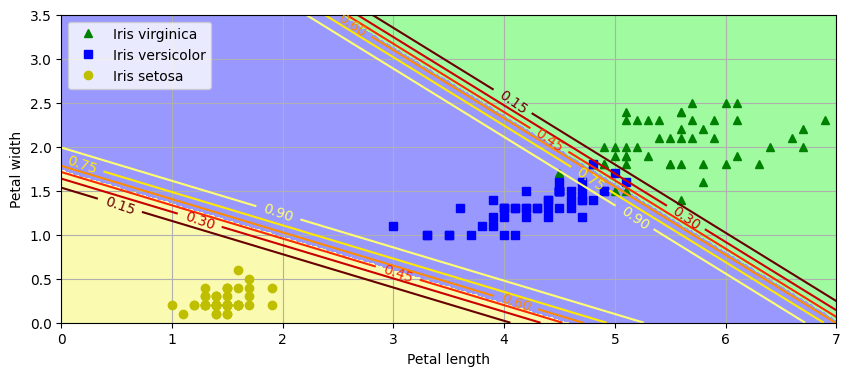

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

custom_cmap = mpl.colors.ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new = (X_new - mean) / std
X_new_with_bias = np.c_[np.ones(len(X_new)), X_new]

logits = X_new_with_bias @ w
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)
zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 7, 0, 3.5])
plt.grid()
plt.show()